<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30478 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30478 non-null  object        
 8   Beds                        30478 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

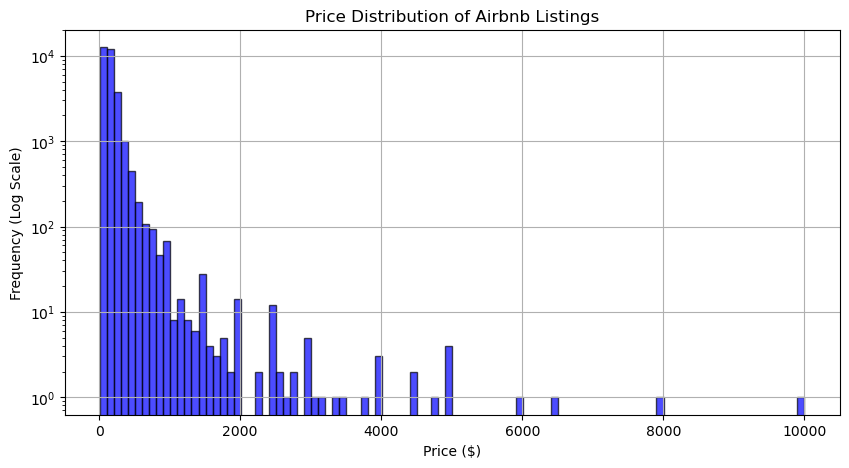

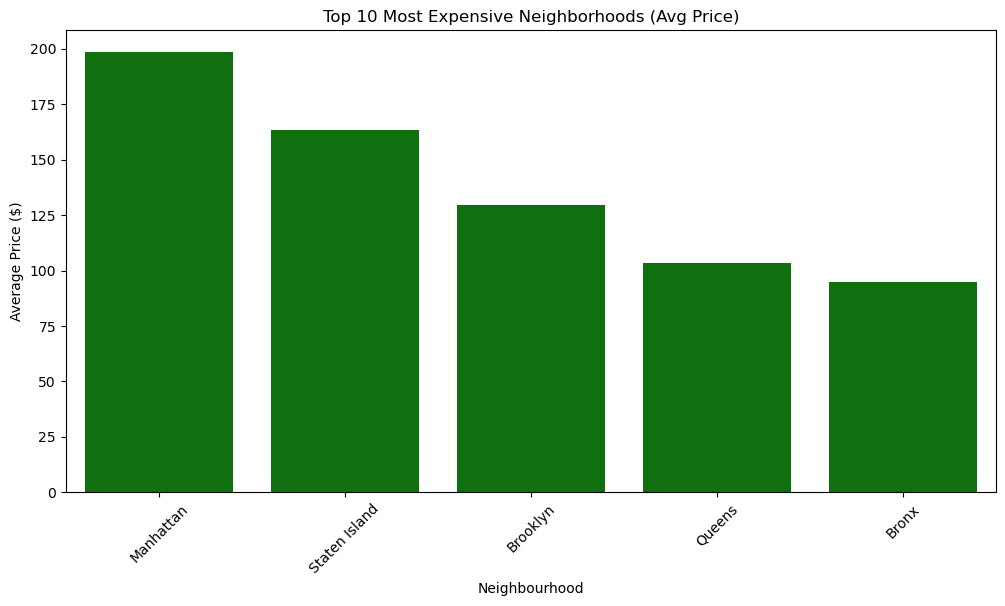

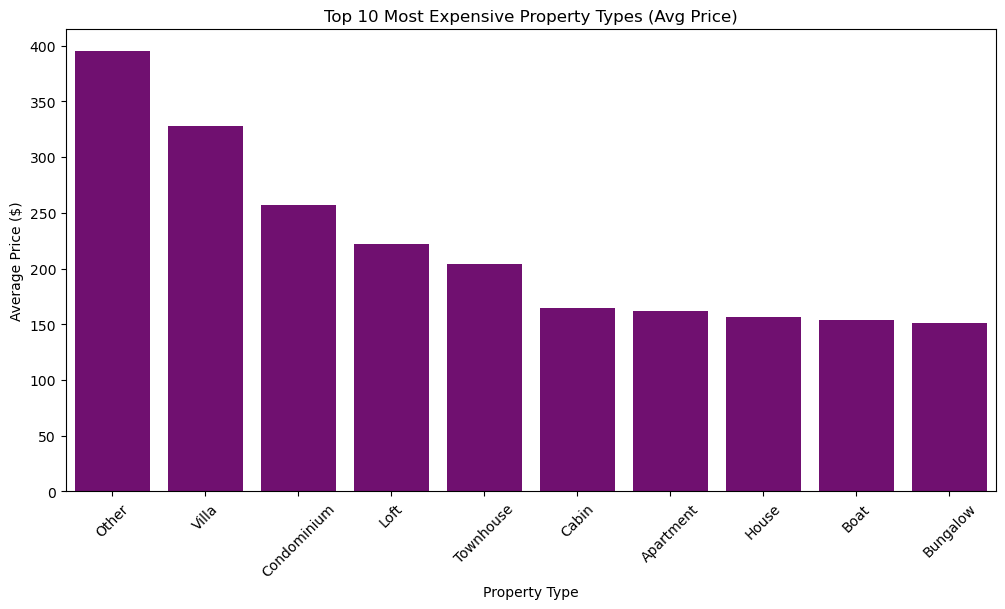

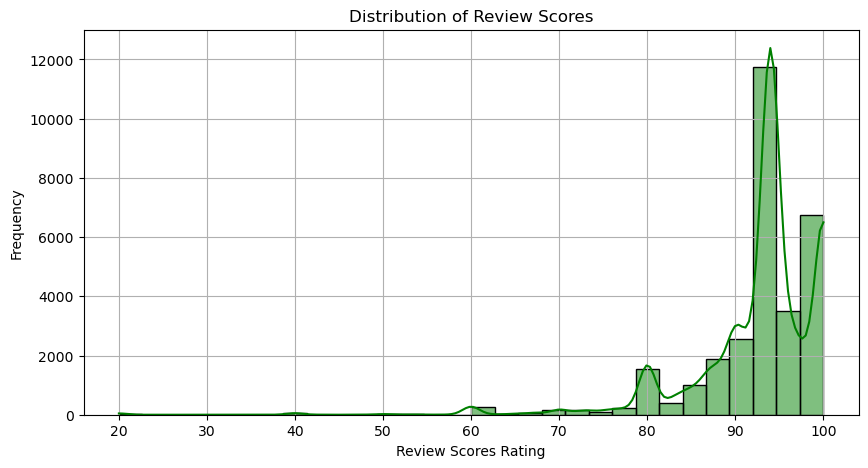

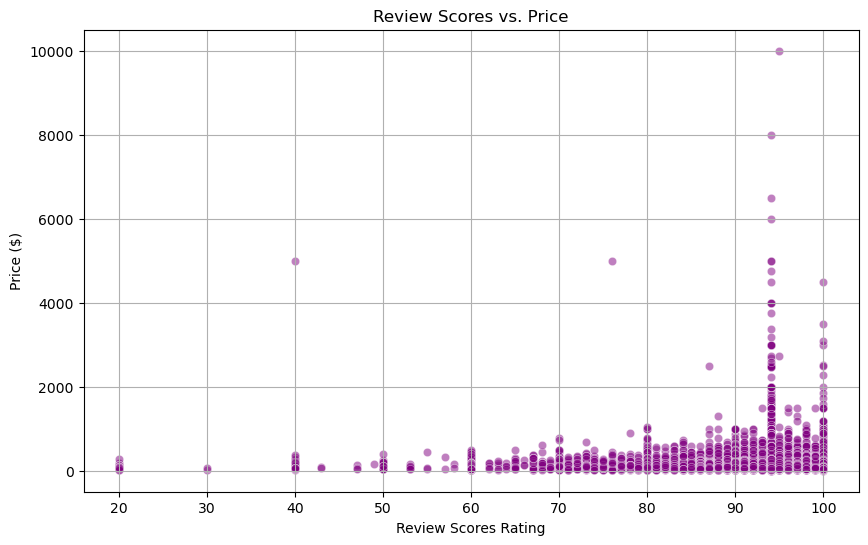

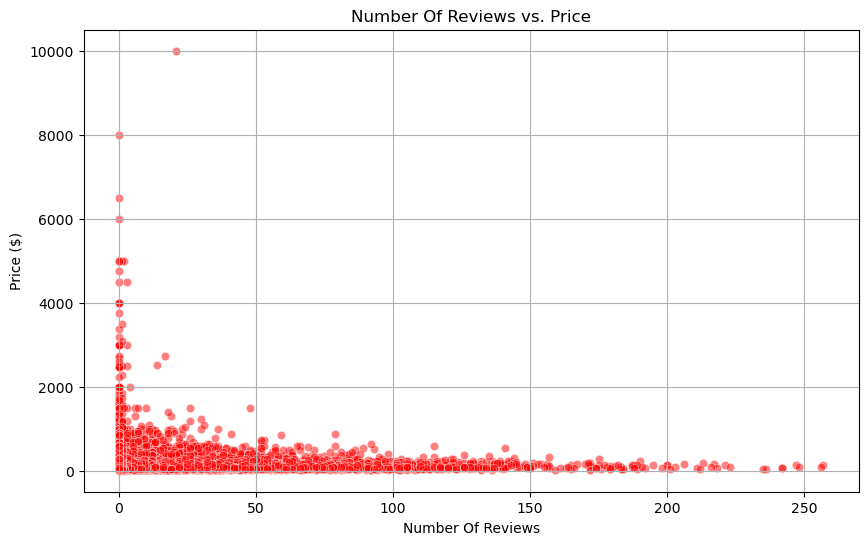

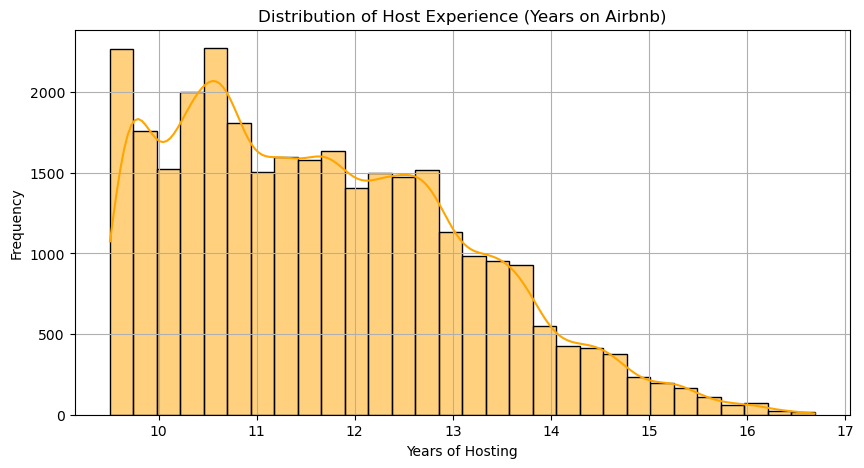

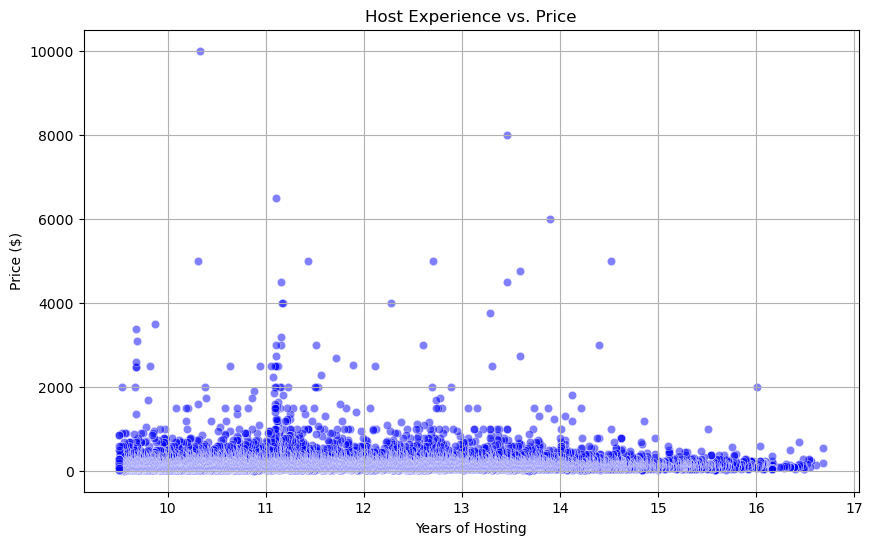

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    df = df.copy()  # Prevent chained assignment issues
    
    # Convert 'Host Since' to datetime format
    df['Host Since'] = pd.to_datetime(df['Host Since'], format="%d/%m/%Y", errors='coerce')
    
    # Fill missing values
    df['Property Type'] = df['Property Type'].fillna('Unknown')
    df['Beds'] = df['Beds'].fillna(df['Beds'].median())
    df['Zipcode'] = df['Zipcode'].fillna(df['Zipcode'].mode()[0])  # Most common zip code
    df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].median())

    # Convert 'Zipcode' to string
    df['Zipcode'] = df['Zipcode'].astype(str)

    # Calculate host experience (years since joining)
    df["Host Experience (Years)"] = (pd.to_datetime("today") - df["Host Since"]).dt.days / 365

    return df

# Function to plot bar charts
def plot_bar_chart(x, y, title, xlabel, ylabel, color="blue"):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y=y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Function to plot scatter charts
def plot_scatter_chart(x, y, title, xlabel, ylabel, color="blue"):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, alpha=0.5, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Function to plot histogram
def plot_histogram(data, bins, title, xlabel, ylabel, color="blue"):
    plt.figure(figsize=(10, 5))
    sns.histplot(data, bins=bins, kde=True, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Load and clean the data
file_path = r"C:\Users\angel\Desktop\Python\Python Datasets\airbnb.csv"
df = load_and_clean_data(file_path)

# Display dataset info
print(df.info())
print(df.head())

# Price distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Price'], bins=100, color='blue', alpha=0.7, edgecolor='black')
plt.yscale('log')
plt.xlabel("Price ($)")
plt.ylabel("Frequency (Log Scale)")
plt.title("Price Distribution of Airbnb Listings")
plt.grid(True)
plt.show()

# Top 10 most expensive neighborhoods
top_neighborhoods = df.groupby("Neighbourhood")["Price"].mean().sort_values(ascending=False).head(10)
plot_bar_chart(
    x=top_neighborhoods.index, y=top_neighborhoods.values,
    title="Top 10 Most Expensive Neighborhoods (Avg Price)",
    xlabel="Neighbourhood", ylabel="Average Price ($)", color="green"
)

# Top 10 most expensive property types
top_property_types = df.groupby("Property Type")["Price"].mean().sort_values(ascending=False).head(10)
plot_bar_chart(
    x=top_property_types.index, y=top_property_types.values,
    title="Top 10 Most Expensive Property Types (Avg Price)",
    xlabel="Property Type", ylabel="Average Price ($)", color="purple"
)

# Review Scores Analysis
plot_histogram(
    data=df["Review Scores Rating"], bins=30,
    title="Distribution of Review Scores", xlabel="Review Scores Rating",
    ylabel="Frequency", color="green"
)

# Review Scores vs Price
plot_scatter_chart(
    x=df["Review Scores Rating"], y=df["Price"],
    title="Review Scores vs. Price", xlabel="Review Scores Rating",
    ylabel="Price ($)", color="purple"
)

# Number of Reviews vs Price
plot_scatter_chart(
    x=df["Number Of Reviews"], y=df["Price"],
    title="Number Of Reviews vs. Price", xlabel="Number Of Reviews",
    ylabel="Price ($)", color="red"
)

# Host Experience Distribution
plot_histogram(
    data=df["Host Experience (Years)"].dropna(), bins=30,
    title="Distribution of Host Experience (Years on Airbnb)",
    xlabel="Years of Hosting", ylabel="Frequency", color="orange"
)

# Host Experience vs Price
plot_scatter_chart(
    x=df["Host Experience (Years)"], y=df["Price"],
    title="Host Experience vs. Price", xlabel="Years of Hosting",
    ylabel="Price ($)", color="blue"
)

